In [3]:
import pandas as pd

# Data load kar rahe hain
df = pd.read_csv('historical_data.csv')

print("--- SAARE COLUMN KE NAAM ---")
# Yeh list print karega, dhyan se dekhna koi space toh nahi hai
print(df.columns.tolist())

print("\n--- DATA TYPES ---")
# Yeh batayega ki kaunsa column text (object) hai aur kaunsa number
print(df.dtypes)

--- SAARE COLUMN KE NAAM ---
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

--- DATA TYPES ---
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


In [7]:
import pandas as pd

# 1. Load Data
df_history = pd.read_csv('historical_data.csv')
df_sentiment = pd.read_csv('fear_greed_index.csv')

# --- Step 1: Clean Column Names ---
df_history.columns = df_history.columns.str.strip()
df_sentiment.columns = df_sentiment.columns.str.strip()

# --- Step 2: Fix Historical Data Dates ---
# Format: 02-12-2024 22:50
df_history['datetime'] = pd.to_datetime(df_history['Timestamp IST'], format='%d-%m-%Y %H:%M')
df_history['date'] = df_history['datetime'].dt.date

# Filter BTC only
df_btc = df_history[df_history['Coin'] == 'BTC'].copy()

# --- Step 3: Fix Sentiment Data Dates (THE FIX) ---
# Maine yahan format='mixed' kar diya hai taaki error na aaye
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'], format='mixed').dt.date

# --- Step 4: Merge ---
merged_df = pd.merge(df_btc, df_sentiment, on='date', how='inner')

# --- Result ---
print("MUBARAK HO! MERGE HO GAYA.")
print(f"Total Rows: {len(merged_df)}")
print(merged_df.head())

# Save file
merged_df.to_csv('final_merged_data.csv', index=False)

MUBARAK HO! MERGE HO GAYA.
Total Rows: 26064
                                      Account Coin  Execution Price  \
0  0x513b8629fe877bb581bf244e326a047b249c4ff1  BTC          82255.0   
1  0x513b8629fe877bb581bf244e326a047b249c4ff1  BTC          82255.0   
2  0x513b8629fe877bb581bf244e326a047b249c4ff1  BTC          82255.0   
3  0x513b8629fe877bb581bf244e326a047b249c4ff1  BTC          82255.0   
4  0x513b8629fe877bb581bf244e326a047b249c4ff1  BTC          82255.0   

   Size Tokens   Size USD Side     Timestamp IST  Start Position  Direction  \
0      0.08585    7061.59  BUY  17-03-2025 04:48         0.00000  Open Long   
1      0.12157    9999.74  BUY  17-03-2025 04:48         0.08585  Open Long   
2      0.00937     770.73  BUY  17-03-2025 04:48         0.20742  Open Long   
3      0.12372   10176.59  BUY  17-03-2025 04:48         0.21679  Open Long   
4      2.64792  217804.66  BUY  17-03-2025 04:48         0.34051  Open Long   

   Closed PnL  ...     Order ID  Crossed        Fee  

--- 1. GENERATING CORRELATION MATRIX ---


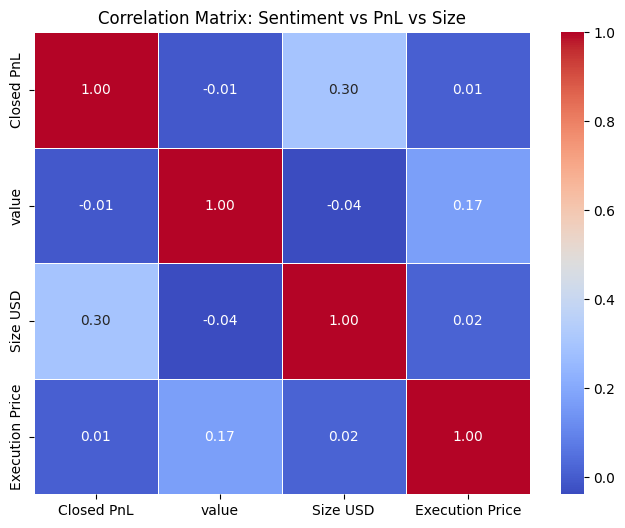


--- 2. TRADER BEHAVIOR IN FEAR vs GREED ---
  classification      Size USD  Closed PnL
2           Fear  30487.554539   48.900673
3          Greed  22693.340318   15.949612
0   Extreme Fear  20822.392788    1.731921
4        Neutral  20699.919487   34.921175
1  Extreme Greed  18013.928095   41.413264


/tmp/ipython-input-4267916297.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Size USD', data=behavior, palette='viridis')


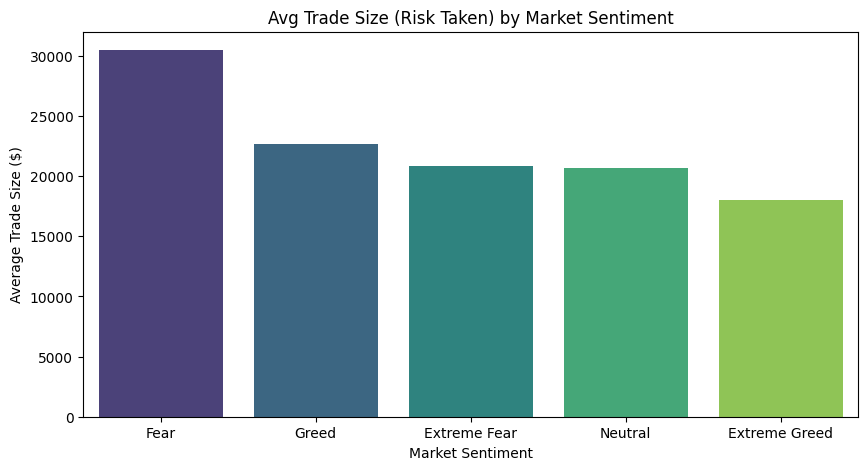

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- ANALYSIS 1: CORRELATION MATRIX ---
print("--- 1. GENERATING CORRELATION MATRIX ---")

# Hum sirf kaam ke numbers select kar rahe hain
# 'value' = Fear/Greed Score (0-100)
# 'Closed PnL' = Profit/Loss
# 'Size USD' = Trade ka size
columns_to_correlate = ['Closed PnL', 'value', 'Size USD', 'Execution Price']

# Correlation calculate karo
corr_matrix = merged_df[columns_to_correlate].corr()

# Heatmap plot karo (Dikkhne mein cool lagta hai presentation ke liye)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Sentiment vs PnL vs Size')
plt.show()

# --- ANALYSIS 2: BEHAVIOR CHECK (Risk Taking) ---
print("\n--- 2. TRADER BEHAVIOR IN FEAR vs GREED ---")

# Check karte hain: Log kis mood mein zyada paisa (Size USD) laga rahe hain?
behavior = merged_df.groupby('classification')[['Size USD', 'Closed PnL']].mean().reset_index()
behavior = behavior.sort_values(by='Size USD', ascending=False) # Sort by heavy betting

print(behavior)

# Iska Graph
plt.figure(figsize=(10, 5))
sns.barplot(x='classification', y='Size USD', data=behavior, palette='viridis')
plt.title('Avg Trade Size (Risk Taken) by Market Sentiment')
plt.ylabel('Average Trade Size ($)')
plt.xlabel('Market Sentiment')
plt.show()

--- BUY (Long) vs SELL (Short) Performance ---
  classification  Side  Closed PnL
0   Extreme Fear   BUY  -31.211710
1   Extreme Fear  SELL   39.267694
2  Extreme Greed   BUY   20.404973
3  Extreme Greed  SELL   70.284308
4           Fear   BUY    2.398288
5           Fear  SELL   97.111153
6          Greed   BUY  -15.017119
7          Greed  SELL   56.474951
8        Neutral   BUY    9.023678
9        Neutral  SELL   71.474618


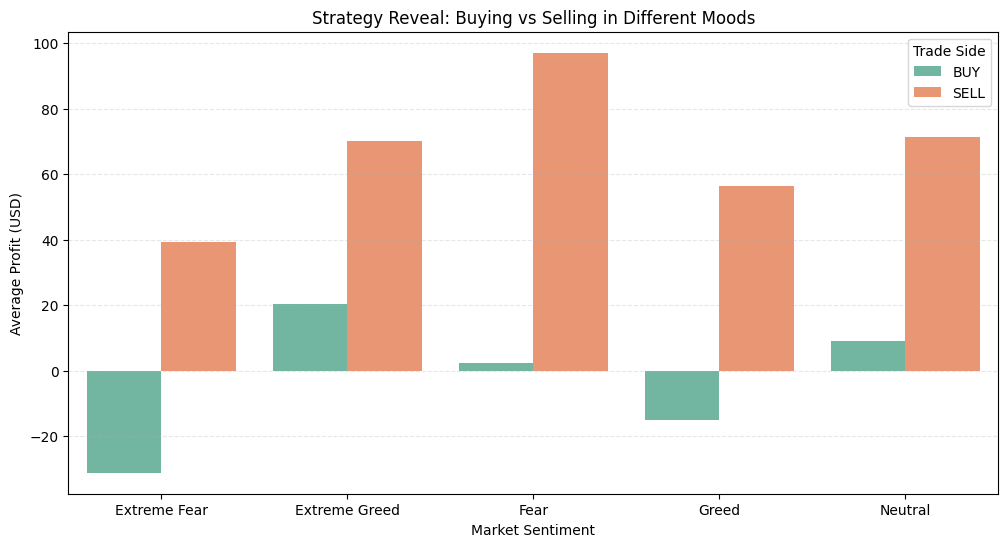

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- STEP 5: LONG vs SHORT STRATEGY CHECK ---
print("--- BUY (Long) vs SELL (Short) Performance ---")

# Group by Sentiment AND Side (Buy/Sell)
strategy_check = merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().reset_index()

print(strategy_check)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='classification', y='Closed PnL', hue='Side', data=strategy_check, palette='Set2')

plt.title('Strategy Reveal: Buying vs Selling in Different Moods')
plt.ylabel('Average Profit (USD)')
plt.xlabel('Market Sentiment')
plt.legend(title='Trade Side')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

--- 1. WHALE vs RETAIL BEHAVIOR ---
Side                               BUY  SELL
classification Trade_Category               
Extreme Fear   Medium              215   198
               Small (Retail)      632   533
               Whale (Big Player)   93    94
Extreme Greed  Medium              469   345
               Small (Retail)      826   566
               Whale (Big Player)  115   115

--- 2. SMART MONEY STRATEGY (TOP 5 TRADERS) ---
Top 5 Profitable Accounts kya karte hain:
Side             BUY  SELL
classification            
Extreme Fear     492   308
Extreme Greed   1187   780
Fear            3357  3363
Greed           2119  1674
Neutral         1191  1155


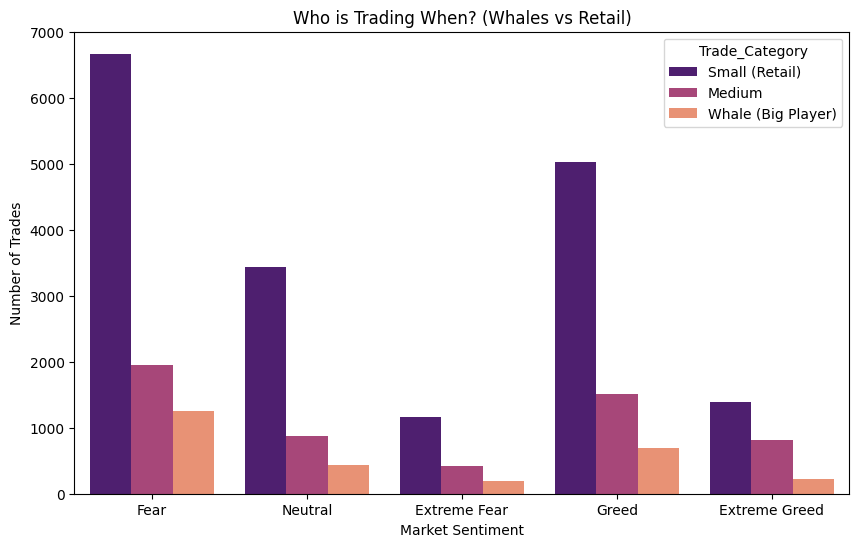

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- PATTERN 1: WHALE vs RETAIL ANALYSIS ---
print("--- 1. WHALE vs RETAIL BEHAVIOR ---")

# Hum define karte hain:
# Small Trade: < $10,000
# Medium Trade: $10,000 - $50,000
# Whale Trade: > $50,000

def categorize_size(size):
    if size < 10000:
        return 'Small (Retail)'
    elif size < 50000:
        return 'Medium'
    else:
        return 'Whale (Big Player)'

# Naya column banate hain 'Trade_Category'
merged_df['Trade_Category'] = merged_df['Size USD'].apply(categorize_size)

# Ab dekhte hain ki 'Extreme Fear' mein Whales kya kar rahe hain vs Retail
whale_analysis = merged_df.groupby(['classification', 'Trade_Category', 'Side']).size().unstack(fill_value=0)

# Sirf 'Extreme Fear' aur 'Extreme Greed' par focus karte hain
filtered_whale = whale_analysis.loc[['Extreme Fear', 'Extreme Greed']]
print(filtered_whale)

# --- PATTERN 2: SMART MONEY (TOP TRADERS) ---
print("\n--- 2. SMART MONEY STRATEGY (TOP 5 TRADERS) ---")

# Sabse zyada profit kamane wale 5 accounts dhoondhte hain
top_traders = merged_df.groupby('Account')['Closed PnL'].sum().nlargest(5).index

# Unka data filter karte hain
smart_money_df = merged_df[merged_df['Account'].isin(top_traders)]

# Dekhte hain woh Fear/Greed mein kya karte hain (Buy ya Sell?)
smart_strategy = smart_money_df.groupby(['classification', 'Side']).size().unstack(fill_value=0)
print("Top 5 Profitable Accounts kya karte hain:")
print(smart_strategy)

# --- Visualizing Whales ---
plt.figure(figsize=(10, 6))
sns.countplot(x='classification', hue='Trade_Category', data=merged_df, palette='magma')
plt.title('Who is Trading When? (Whales vs Retail)')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.show()

--- PERCENTAGE BREAKDOWN (Table) ---
Trade_Category  Medium  Small (Retail)  Whale (Big Player)
classification                                            
Extreme Fear     23.40           66.01               10.59
Extreme Greed    33.42           57.14                9.44
Fear             19.77           67.58               12.65
Greed            20.93           69.52                9.56
Neutral          18.51           72.42                9.07

--- GENERATING PIE CHARTS... ---


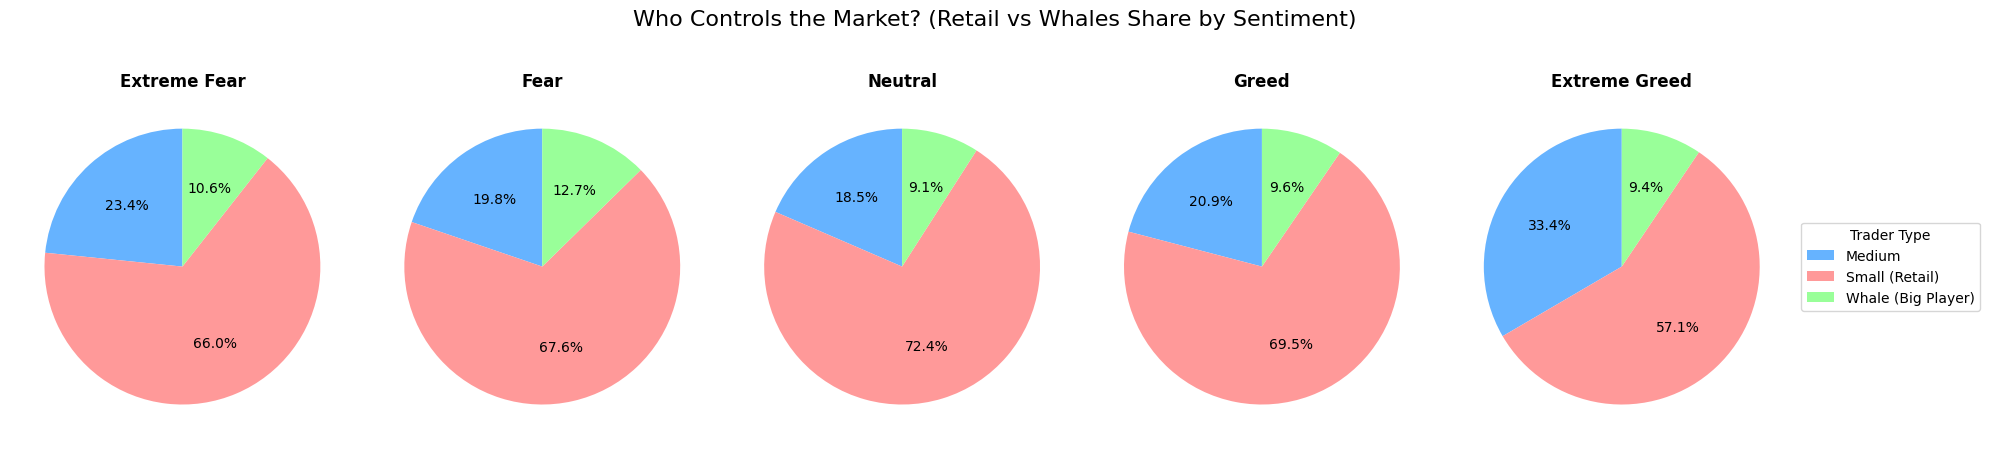

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# --- STEP 1: ENSURE CATEGORIES EXIST ---
# (Safety ke liye dubara define kar raha hoon agar pichla code udd gaya ho)
def categorize_size(size):
    if size < 10000:
        return 'Small (Retail)'
    elif size < 50000:
        return 'Medium'
    else:
        return 'Whale (Big Player)'

if 'Trade_Category' not in merged_df.columns:
    merged_df['Trade_Category'] = merged_df['Size USD'].apply(categorize_size)

# --- STEP 2: PREPARE DATA FOR PIE CHARTS ---
# Hum counts nikalenge aur unhe transpose karenge
pie_data = merged_df.groupby(['classification', 'Trade_Category']).size().unstack(fill_value=0)

# Sentiments ka order fix karte hain
sentiments_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
# Sirf wahi rakhte hain jo data mein exist karte hain
existing_sentiments = [s for s in sentiments_order if s in pie_data.index]

# --- STEP 3: PLOT PIE CHARTS ---
fig, axes = plt.subplots(1, len(existing_sentiments), figsize=(20, 5))

colors = {'Small (Retail)': '#ff9999', 'Medium': '#66b3ff', 'Whale (Big Player)': '#99ff99'}

print("--- PERCENTAGE BREAKDOWN (Table) ---")
# Table print karte hain percentage mein
percentage_table = pie_data.div(pie_data.sum(axis=1), axis=0) * 100
print(percentage_table.round(2))

print("\n--- GENERATING PIE CHARTS... ---")

for ax, sentiment in zip(axes, existing_sentiments):
    # Us sentiment ka data nikalo
    data = pie_data.loc[sentiment]

    # Pie Chart banao
    wedges, texts, autotexts = ax.pie(data,
                                      labels=None, # Labels side mein lagayenge
                                      autopct='%1.1f%%', # Percentage dikhao
                                      colors=[colors.get(x, '#cccccc') for x in data.index],
                                      startangle=90,
                                      textprops={'fontsize': 10})

    ax.set_title(sentiment, fontsize=12, fontweight='bold')

# Legend (Side mein ek baar)
plt.legend(pie_data.columns, title="Trader Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.suptitle("Who Controls the Market? (Retail vs Whales Share by Sentiment)", fontsize=16)
plt.tight_layout()
plt.show()

--- CROSS ANALYSIS: SENTIMENT vs TRADE SIZE ---
Size_Class      Small (Retail)    Medium  Large (Whale)
classification                                         
Extreme Fear          0.267465  7.134647      -1.484299
Fear                  0.538535  6.133557     137.485528
Neutral               0.234629  4.923637     114.571924
Greed                -0.550284  2.836702      48.001546
Extreme Greed         0.517546  6.858799      90.368878


/tmp/ipython-input-3199598271.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = merged_df.pivot_table(index='classification', columns='Size_Class', values='Closed PnL', aggfunc='mean')


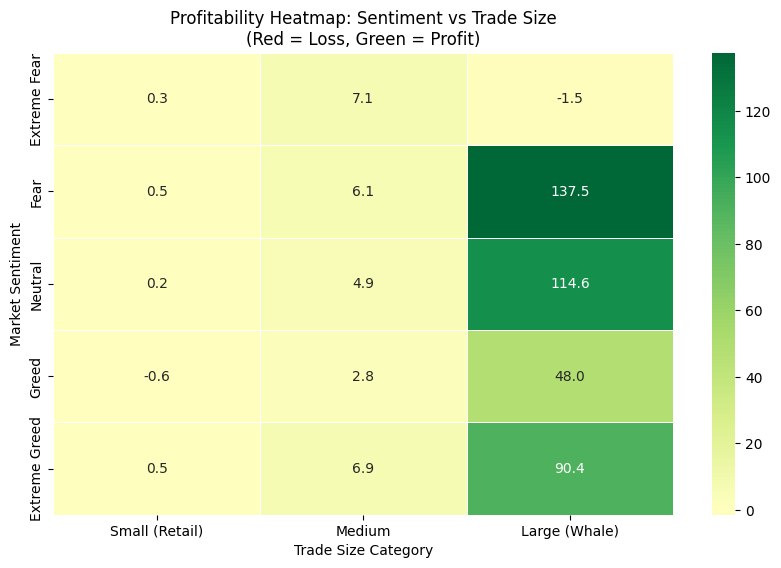

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- ADVANCED ANALYSIS: CROSSING TWO FEATURES ---
# Feature 1: Sentiment (Fear/Greed)
# Feature 2: Trade Size Class (Small vs Medium vs Large)

print("--- CROSS ANALYSIS: SENTIMENT vs TRADE SIZE ---")

# 1. Trade Size ko 3 hisso mein baant te hain (Small, Medium, Large/Whale)
# Hum quantile cut use karenge taaki data barabar batein
merged_df['Size_Class'] = pd.qcut(merged_df['Size USD'], q=3, labels=['Small (Retail)', 'Medium', 'Large (Whale)'])

# 2. Pivot Table banate hain
# Rows: Sentiment
# Columns: Size Class
# Values: Average Profit (PnL)
heatmap_data = merged_df.pivot_table(index='classification', columns='Size_Class', values='Closed PnL', aggfunc='mean')

# Sentiment ka order sahi karte hain
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
heatmap_data = heatmap_data.reindex(sentiment_order)

print(heatmap_data)

# --- VISUALIZATION: HEATMAP ---
plt.figure(figsize=(10, 6))
# Annot=True se numbers dikhenge, fmt='.1f' se decimal limit hoga
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=0, fmt='.1f', linewidths=0.5)

plt.title('Profitability Heatmap: Sentiment vs Trade Size\n(Red = Loss, Green = Profit)')
plt.ylabel('Market Sentiment')
plt.xlabel('Trade Size Category')
plt.show()